In [1]:
#!!NOTEE!!
#PLEASE CHANGE ALL PATHS TO YOUR OWN SO THE CODE WORKS PROPERLY (in the HTML file as well)

import pandas as pd
import matplotlib.pyplot as plt
    
# Initializing our path to the CSV file
file_path = r'D:\\Projects\\Movies Recommendation\\'

# Convert our CSV file into a DataFrame 'df'
df = pd.read_csv(file_path+"final_dataset.csv", encoding='latin1')

# Taking all the values under the column name 'movie_titles' until their second to last element (to avoid the " ?" after every title)
df['movie_title'] = df['movie_title'].str[:-2]
print("Initial DateFrame:")
print(df)


,index,director,duration,actor_2_name,genres,main_actor,movie_title,num_voted_users,actor_3_name,movie_imdb_link,num_user_for_reviews,language,country,title_year,imdb_score
0,0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar?,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,2009.0,7.9
1,1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End?,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,2007.0,7.1
2,2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre?,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,2015.0,6.8
3,3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises?,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,2012.0,8.5
4,4,Doug Walker,NaN,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens? ...,8,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,NaN,43.0,Valorie Curry,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following?,73839,Sam Underwood,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,NaN,7.5
5040,5040,Benjamin Roberds,76.0,Maxwell Moody,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant?,38,David Chandler,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,2013.0,6.3
5041,5041,Daniel Hsia,100.0,Daniel Henney,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling?,1255,Eliza Coupe,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,2012.0,6.3
5042,5042,Jon Gunn,90.0,Brian Herzlinger,Documentary,John August,My Date with Drew?,4285,Jon Gunn,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,84.0,English,USA,2004.0,6.6


In [10]:
# Data structure summaries
print("An overview of the structure of the utilized dataset:")
print(df.info())

print()
print("A short summary of the utilized dataset:")
print(df.describe())
print()


# Checking for duplicate values in "movie_title" and dropping them
duplicates = df[df.duplicated('movie_title', keep=False)]
df = df.drop_duplicates('movie_title')

# Dropping all rows with any missing/empty values
df = df.dropna()

An overview of the structure of the utilized dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5044 non-null   int64  
 1   director              4940 non-null   object 
 2   duration              5029 non-null   float64
 3   actor_2_name          5031 non-null   object 
 4   genres                5044 non-null   object 
 5   main_actor            5037 non-null   object 
 6   movie_title           5044 non-null   object 
 7   num_voted_users       5044 non-null   int64  
 8   actor_3_name          5021 non-null   object 
 9   movie_imdb_link       5044 non-null   object 
 10  num_user_for_reviews  5023 non-null   float64
 11  language              5030 non-null   object 
 12  country               5039 non-null   object 
 13  title_year            4936 non-null   float64
 14  imdb_score        

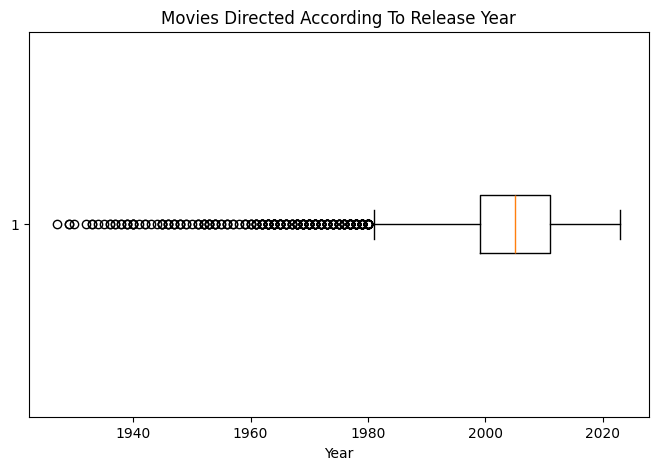

In [11]:
# Create a horizontal box plot for the 'title_year' column
plt.figure(figsize=(8, 5))
plt.boxplot(df['title_year'], vert=False)  
plt.title('Movies Directed According To Release Year')
plt.xlabel('Year')
plt.savefig('yearboxplot.jpg')  # Save as image to use for HTML file
plt.show()

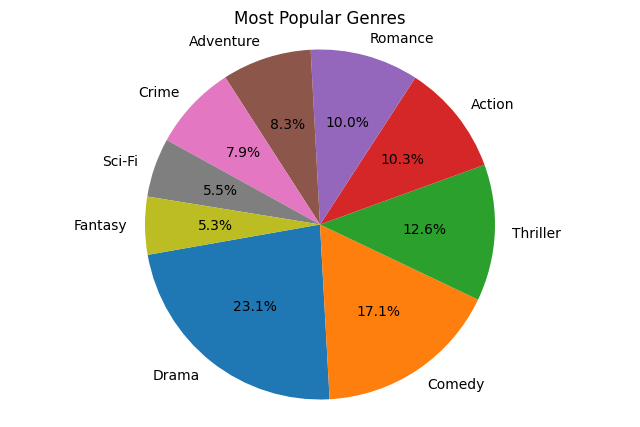

In [12]:

# Split values in the column 'genres' by '|', create dummy variables, get the sum of occurrences for each value, sort it to descending
genre_types = df['genres'].str.get_dummies('|').sum().sort_values(ascending=False)
    
# Create a pie chart for the top 9 most popular genres throughout the years
genre_types = genre_types.head(9)
plt.figure(figsize=(8, 5))
plt.pie(genre_types, labels = genre_types.index, autopct='%1.1f%%', startangle=190)
plt.title('Most Popular Genres')
plt.savefig('genrepieplot.jpg')
plt.axis('equal') 
plt.show()


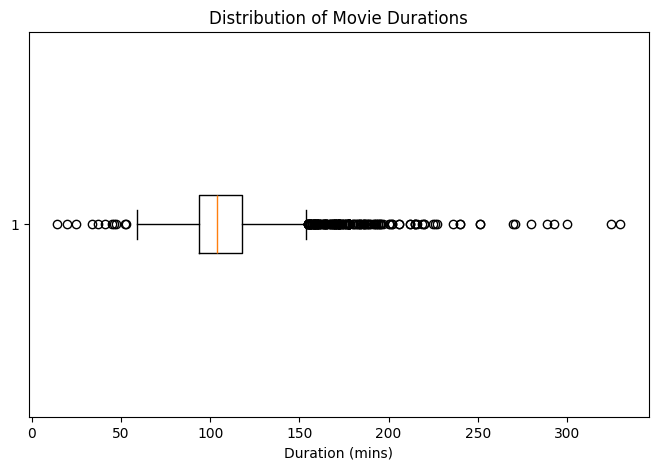

In [13]:
# Create a box plot for the longest durations
plt.figure(figsize=(8, 5))
plt.boxplot(df['duration'], vert=False)  
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (mins)')
plt.savefig('timeboxplot.jpg') 
plt.show()

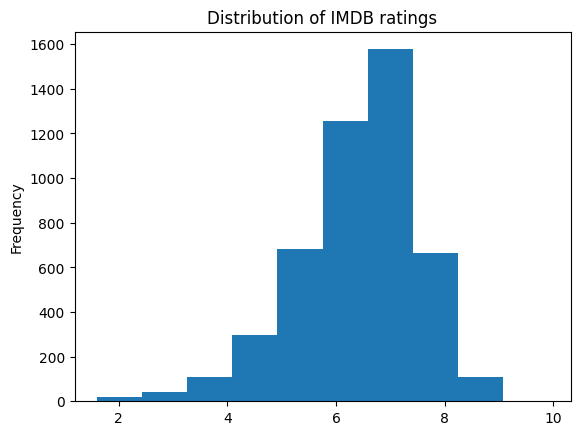

In [14]:
# Create a histogram based on the frequency of imdb rates
plt.title('Distribution of IMDB ratings')
df['imdb_score'].plot(kind='hist')
plt.savefig('imdbhistplot.jpg')
plt.show()

In [15]:
# Identifying the unnecessary columns and dropping them while ignoring any errors that might occur
columns_to_remove = ['index', 'actor_2_name', 'actor_3_name', 'country', 'language', 'num_user_for_reviews', 'num_voted_users']  
df = df.drop(columns=columns_to_remove, errors='ignore')

# Combine the first(head) and last(tail) 5 rows into one df and printing it
combined_df = df.head(5)._append(df.tail(5))
print("Combined DataFrame:")
print(combined_df)


Combined DataFrame:
               director  duration                           genres  \
0         James Cameron     178.0  Action|Adventure|Fantasy|Sci-Fi   
1        Gore Verbinski     169.0         Action|Adventure|Fantasy   
2            Sam Mendes     148.0        Action|Adventure|Thriller   
3     Christopher Nolan     164.0                  Action|Thriller   
5        Andrew Stanton     132.0          Action|Adventure|Sci-Fi   
5038        Scott Smith      87.0                     Comedy|Drama   
5040   Benjamin Roberds      76.0            Drama|Horror|Thriller   
5041        Daniel Hsia     100.0             Comedy|Drama|Romance   
5042           Jon Gunn      90.0                      Documentary   
5043    Davit Ghazaryan      95.0              Class|Course|Lesson   

           main_actor                               movie_title  \
0         CCH Pounder                                    Avatar   
1         Johnny Depp  Pirates of the Caribbean: At World's End   
2     Ch

In [16]:
# Filtaration starts here
name = input('What is your name? ')

while True:
     # Ask the user if they have any preferences and check if it's a string(isalpha)
    while True:
        user_opinion = input("Do you have any movie preferences(Yes-Y, No-N)? ").lower()
        if user_opinion.isalpha():
            if user_opinion == 'y':
                break
            elif user_opinion == 'n':
                print("Have a nice day!")
                break
            else:
                print("You have entered an invalid another input, try again!")
                continue
        else:
            print("You have entered an invalid input, try again!")
            continue
    # If the user doesn't need any filtration, the entire program stops and leaves the while loop
    if user_opinion == 'n':
        break



    # Create a category list where the user must input their preferred categories
    category_list = []

    # Create a value list where the user must input their preferred values for each category input
    value_list = []

    # Create a new DataFrame according to to store all the filtered data at the end
    filtered_df = pd.DataFrame()

    # Create a list with all the possible category inputs
    default_list = ['director', 'genres', 'main_actor']

    # Ask the user to input at most 3 categories from the given default list and separate it with commas
    while True:
        user_category = input(f"Please choose up to 3 categories out of these variants {default_list} separated by commas: ").lower()
        category_list = [cat.strip() for cat in user_category.split(",")]
        # Check whether the number of categories entered is zero or exceeds the amount in the default list and ask again
        if len(category_list) >= 4 or len(category_list) == 0:
            print("\033[91mInvalid input, try again!\033[0m")
            continue
        else:
            # Take a variable with a boolean value
            invalid_input = False
            for cat in category_list:
                # If any input category does not belong to the default list, take the truth value, print invalid input, and ask again
                if cat not in default_list:
                    invalid_input = True #This indicates that at least one category in the category_list is invalid
                    break
            if invalid_input:
                print("\033[91mInvalid input, try again!\033[0m")
                continue
            else:
                break

     # User filtration starts here
    for i in range(len(category_list)):
        while True:
            # If the category is 'genres', replace commas with '|' and sort alphabetically with a first capital letter
            v = input(f"Enter your preferred {category_list[i]} seperated by commas: ").strip().title()
            if category_list[i] == 'genres':
                v = '|'.join(sorted(v.split(',')))
                # Check if values contain only letters or if value == 'sci-fi' or "Sci-Fi", otherwise ask again
                value_checking = []
                for value1 in v.split(','):
                    value_checking.append(value1.strip())
                for value2 in value_checking:
                    if value2 == 'Sci-Fi' or 'sci-fi':
                        continue
                    elif not all(genres.isalpha() for genres in value_checking):
                        print("\033[91mInvalid input, try again! (Input should contain only letters and ',')\033[0m")
                        continue
            # Ask for values corresponding to each input category (except genres), and sort alphabetically with a first capital letter      
            else:
                # Check if each input value contains only letters and spaces, otherwise ask again
                if not all(word.isalpha() or word.isspace() for word in v):
                    print("\033[91mInvalid input, try again! (Input should contain only letters and spaces)\033[0m")
                    continue

            # Append all user input values to the value list using list comprehension 
            value_list.append([val.strip() for val in v.split(',')])
            break

    # Create a new DataFrame on the initial DataFrame 'df', convert 'imdb_score' to numeric, if non-numeric values convert to NaN
    df_cleaned = df
    df_cleaned['imdb_score'] = pd.to_numeric(df_cleaned['imdb_score'], errors='coerce')


    # Take a variable to filter the DataFrame based on all conditions
    isittrue = None

    # Go over each category and its corresponding value
    for i in range(len(category_list)):
        # Filter the DataFrame based on the user input for the the exact match
        condition = df_cleaned[category_list[i]] == value_list[i][0].strip()
        # For 'genres', use the exact match, 
        # Use the lambda function to check if the specified genres are a subset of the set of values in the 'genres' column 
        # This allows us to filter all the movies containing at least both of the specified genres together, 
        # i.e. 'genres' = romance, horror, it will also take the movies romance, horror, fantasy, and won't separate the genre preferences 
        if category_list[i] == 'genres':
            condition = df_cleaned[category_list[i]].apply(lambda x: set(value_list[i][0].split('|')).issubset(set(x.split('|'))))
        else:
            # if not 'genres', then check if the input value is present in each elememt of the specified column
            condition = df_cleaned[category_list[i]].apply(lambda x: value_list[i][0].strip() in x)

        # Update isittrue based on the current condition
        if isittrue is None:
            isittrue= condition
            
        #update isittrue with both the previous condition and the new one
        else:
            isittrue = isittrue & condition


    # Apply the combined conditions (isittrue) to filter the DataFrame as a whole
    filtered_df = df_cleaned[isittrue]

    # Sort the DataFrame by 'imdb_score' in descending order
    df_sorted = filtered_df.sort_values(by='imdb_score', ascending=False)
    
    # Print the first 3 rows with the highest scores according to the filtration, otherwise ask again
    columns_to_print = df_sorted[['movie_title', 'movie_imdb_link', 'duration', 'imdb_score', 'main_actor', 'director', 'genres']]
    if len(columns_to_print)==0:
        print("Unfortunately there are no movies according to your provided preferences.")
        continue_condition = input("Do you want to continue?(Y-yes,N-no)").lower()
        while True:
            if continue_condition == "y":
                break
            elif continue_condition == "n":
                break
            else:
                continue_condition = input("You have entered another input, try again!")
        if continue_condition == "n":
            print("Have a nice day!")
            break 
        else:
            continue
    
    # Print the final result
    print("Here is the final result based on your preferences:")
    print(columns_to_print[:3])
    print()


    # Display everything in an HTML file
    file = open(file_path + "report.html", 'w', encoding='latin1')
    file.write('<html>\n<head>\n<style>\n')
    file.write('body {\n    background-color: lightblue;\n    display: flex;\n    justify-content: center;\n    align-items: center;\n    flex-direction: column;\n}\n')
    file.write('.centered-image {\n    display: flex;\n    justify-content: center;\n    align-items: center;\n}\n')
    file.write('</style>\n</head>\n<body>\n')
    file.write('<div class="centered-image">\n')
    file.write('<img src="D:\\Projects\\Movies Recommendation\\action.png" width="500">\n')
    file.write('</div>\n')
    file.write(combined_df.to_html(render_links=True, escape=False))
    file.write('<br>\n') 
    file.write('<img src="D:\\Projects\\Movies Recommendation\\yearboxplot.jpg" width="600">')
    file.write('<br>\n') 
    file.write('<img src="D:\\Projects\\Movies Recommendation\\genrepieplot.jpg" width="600">')
    file.write('<br>\n') 
    file.write('<img src="D:\\Projects\\Movies Recommendation\\timeboxplot.jpg" width="600">')
    file.write('<br>\n') 
    file.write('<img src="D:\\Projects\\Movies Recommendation\\imdbhistplot.jpg" width="600">')
    file.write('<br>\n') 
    file.write(name)
    file.write('<p>We hope You enjoy the movies !</p>')
    file.write('<img src="D:\\Projects\\Movies Recommendation\\popcorn.jpg" width="600">')
    file.write('<img src="D:\\Projects\\Movies Recommendation\\lights.png" width="400">')
    file.write('<p>Here is the final result based on your preferences:: </p>')
    file.write(columns_to_print[:3].to_html(render_links=True, escape=False))
    file.write('<br>\n') 
    file.write('<p>Directed by: Araksya Gevorgyan | Nareg Laklakian | Roman Ghukasyan | Sereen Sipan</p>')
    file.write('</body>\n</html>')
    file.close()

    ask = str(input("Continue searching? (y-yes / n-no)")).lower().strip()
    while True:
            if ask == "y":
                break
            elif ask == "n":
                break
            else:
                ask = input("You have entered another input, try again!")
    if ask == "n":
        print("Have a nice day!")
        break 
    else:
        continue


Invalid input, try again!
Here is the final result based on your preferences:
              movie_title                                    movie_imdb_link  \
679            Death Race  http://www.imdb.com/title/tt0452608/?ref_=fn_t...   
2274  Crank: High Voltage  http://www.imdb.com/title/tt1121931/?ref_=fn_t...   
1034              The One  http://www.imdb.com/title/tt0267804/?ref_=fn_t...   

      duration  imdb_score     main_actor            director  \
679      111.0         6.4  Jason Statham  Paul W.S. Anderson   
2274      96.0         6.2  Jason Statham      Mark Neveldine   
1034      85.0         5.9  Jason Statham          James Wong   

                            genres  
679         Action|Sci-Fi|Thriller  
2274  Action|Crime|Sci-Fi|Thriller  
1034        Action|Sci-Fi|Thriller  

Have a nice day!
